In [1]:
import numpy as np
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

D:\Programmes\Anaconda3\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
seg = np.load("Img/test_mini_seg.npy")
seg = seg[:,:,:,0]

In [3]:
np.shape(seg)

(60, 1086, 1248)

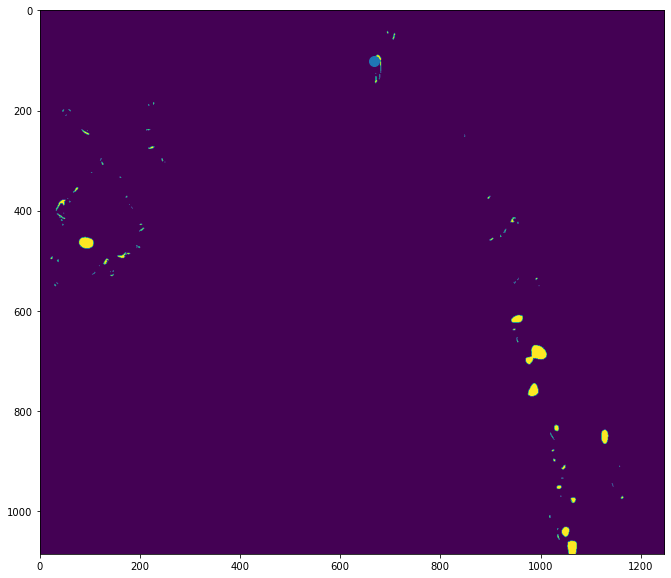

In [8]:
plt.figure(figsize=(30,10))
plt.imshow(seg[1,:,:])
t = [100.5, 668.0]
plt.scatter(t[1], t[0], s=100)
plt.show()

In [5]:
label_seg = label(seg)
regions_seg = regionprops(label_seg)

In [6]:
regions_seg

 ...]

In [7]:
# Get Properties

n = len(regions_seg)
x_fascia = 970

regions_l = []
regions_r = []

x_c = []
y_c = []
z_c = []

# Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions_seg:

    # Getting the centroids
    
    z0, y0, x0 = props.centroid
    x_c.append(x0)
    y_c.append(y0)
    z_c.append(z0)
    
    cond = x0 < x_fascia
    if (cond):
        regions_l.append(props)
    else:
        regions_r.append(props)
    
areas_l = []
orient_l = []

# Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    o = props.moments
    orient_l.append(o)
    
areas_r = []
orient_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    o = props.moments
    orient_r.append(o)